# REGRESIÓN LINEAL SIMPLE

In [1]:
import numpy as np
from sklearn.datasets import make_regression
import  matplotlib.pyplot as plt

## Datos artificiales para regresión lineal

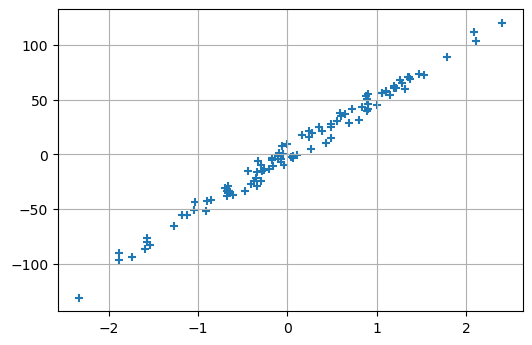

In [13]:
X, y = make_regression(n_samples=100, n_features=1, noise=5)

figura, ejes = plt.subplots(dpi=100)
ejes.scatter(X, y, marker="+")
ejes.grid(True)

# LinearRegression (SKLEARN) - Mínimos Cuadrados

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
regresion_sklearn = LinearRegression()

In [16]:
regresion_sklearn.fit(X,y)

LinearRegression()

In [17]:
regresion_sklearn.coef_, regresion_sklearn.intercept_, regresion_sklearn.score(X,y)

(array([51.29451117]), -0.0769200142187465, 0.9879610758270553)

# linregress (SCIPY) - Mínimos Cuadrados

In [18]:
from scipy.stats import linregress

In [19]:
X.shape, y.shape

((100, 1), (100,))

In [20]:
a, b, r, p, stderr = linregress(X.reshape(-1,), y)

In [21]:
print(linregress(X.reshape(-1,), y))

LinregressResult(slope=51.29451117495661, intercept=-0.07692001421874473, rvalue=0.9939623110697182, pvalue=7.187743984572575e-96, stderr=0.5719812334467689, intercept_stderr=0.554299751655327)


In [22]:
r **2

0.9879610758270553

# DESCENSO DEL GRADIENTE ESTOCÁSTICO

In [69]:
from sklearn.linear_model import SGDRegressor

In [70]:
regr = SGDRegressor(max_iter=5000, tol=1e-5, random_state=20)

In [71]:
regr.fit(X, y)

SGDRegressor(max_iter=5000, random_state=20, tol=1e-05)

In [73]:
regr.coef_, regr.intercept_, regr.score(X,y)

(array([68.78611356]), array([0.28389602]), 0.9952195873919644)

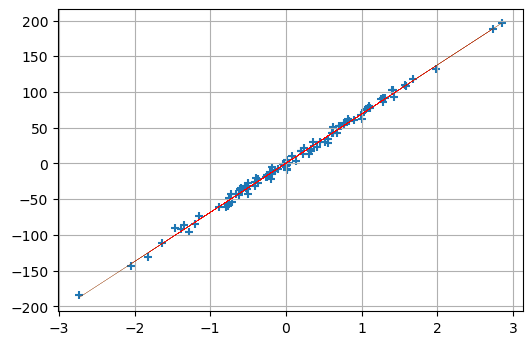

In [75]:
figure, axes = plt.subplots(dpi=100)
axes.scatter(X,y, marker='+')
axes.plot(X, regresion_sklearn.coef_*X+regresion_sklearn.intercept_, color='green', lw=0.1)
axes.plot(X, regr.coef_*X + regr.intercept_, color = 'red', lw=0.1)
axes.grid(True)

# SIGNIFICADO ESTOCÁSTICO:

    - Se define una época como una pasada por todas las muestras de un experimento

    - Se van sirviendo las muestras previa permutación de su orden antes de cada época

    - Se corrobora experimentalmente que es más eficiente

In [76]:
from random import shuffle
epoca = ['a', 'b', 'c', 'd', 'e']

In [78]:
for i in range(5):
    shuffle(epoca)
    print(epoca)

['c', 'e', 'a', 'd', 'b']
['a', 'e', 'b', 'd', 'c']
['a', 'c', 'e', 'd', 'b']
['d', 'c', 'e', 'b', 'a']
['b', 'c', 'd', 'e', 'a']


Init signature:
SGDRegressor(
    loss='squared_loss',
    *,
    penalty='l2',
    alpha=0.0001,
    l1_ratio=0.15,
    fit_intercept=True,
    max_iter=1000,
    tol=0.001,
    shuffle=True,
    verbose=0,
    epsilon=0.1,
    random_state=None,
    learning_rate='invscaling',
    eta0=0.01,
    power_t=0.25,
    early_stopping=False,
    validation_fraction=0.1,
    n_iter_no_change=5,
    warm_start=False,
    average=False,
)
Docstring:     
Linear model fitted by minimizing a regularized empirical loss with SGD

SGD stands for Stochastic Gradient Descent: the gradient of the loss is
estimated each sample at a time and the model is updated along the way with
a decreasing strength schedule (aka learning rate).

The regularizer is a penalty added to the loss function that shrinks model
parameters towards the zero vector using either the squared euclidean norm
L2 or the absolute norm L1 or a combination of both (Elastic Net). If the
parameter update crosses the 0.0 value because of t